## Athens Airbnb Invest: Location, Amenities & Revenue Forecast

I am thinking about starting an Airbnb business in Athens — either buying or renting an apartment to host on the platform. 
Since I am not familiar with the city, my first three questions are:

Question 1: Which neighborhoods should I consider buying or renting in?

Question 2: What equipment and furnishings will maximize my occupancy and bookings?

Question 3: How can I estimate the expected revenue for a new listing? 

Let’s begin the data analysis to extract key insights that will help us make the right decision.

## Gather the data

In [ ]:
## I am using a jupiter notebook in Cloud
## Also the data was downloadied and importied on my personal S3 bucket also in cloud
## I was using pandas dataframe for reading the data, sp let se how the data are looking like. 

import pandas as pd

df = pd.read_csv("s3://pcp-analytics-data-cdl/Jonida/Udacity/Project1/listings.csv.gz", compression="gzip")      # infers gzip by .gz
df.head()


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,27262,https://www.airbnb.com/rooms/27262,20250926033717,2025-09-27,previous scrape,"AQA-No7, Great mattress, high speed internet",THE MATTRESS - KING KOIL - Camden Luxury 160x2...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,37177,...,4.97,4.75,4.71,00002433111,t,1,1,0,0,0.18
1,33945,https://www.airbnb.com/rooms/33945,20250926033717,2025-09-26,city scrape,Spacious Cosy aprtm very close to Metro!,Apartment located near metro station. Safe nei...,Neighbourhood is alive all day and safe all da...,https://a0.muscache.com/pictures/1a7a1026-f5f1...,146553,...,4.91,4.64,4.81,00000874421,f,1,1,0,0,0.49
2,49489,https://www.airbnb.com/rooms/49489,20250926033717,2025-09-26,city scrape,Ermou 44 - 3bdr apt in the heart of Athens,"Fully furnished, 98 sq.mt., apartment on 44 Er...",The apartment is located at the commercial cen...,https://a0.muscache.com/pictures/9640239/4bfd2...,225612,...,4.87,4.89,4.69,00000876484,t,3,3,0,0,0.83
3,60394,https://www.airbnb.com/rooms/60394,20250926033717,2025-09-26,city scrape,Cosy apartment! Great central Athens location!,Fully furnished cozy apartment in the best nei...,Very centrally located with a feeling of a qui...,https://a0.muscache.com/pictures/477282/db550f...,290864,...,4.97,4.92,4.92,00000508830,f,1,1,0,0,0.29
4,134340,https://www.airbnb.com/rooms/134340,20250926033717,2025-09-27,previous scrape,Neo Pagrati Athens Apartment,Little gem with the best of all worlds! Locate...,Our street is a small one with very little tra...,https://a0.muscache.com/pictures/1232312/4edeb...,659406,...,4.93,4.56,4.83,00002821300,f,1,1,0,0,0.36


In [ ]:
#Lets see how many columns we have and what information has every column. 

print(df.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

## Question 1: Which neighborhoods should I consider buying or renting in?
For the first question, we should start by filtering the dataset to keep only the relevant columns. 
Host-related fields such as host_url, host_name, and host_since are not useful for our decision (I will be the host), so we can drop them.
Keep fields that matter for location and revenue analysis

In [ ]:
# Select the needed columns
df = df[['id',
       'neighbourhood_cleansed', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
      'calendar_updated', 'review_scores_value', 'review_scores_location',
      'availability_365','has_availability']]
df.head()

,id,neighbourhood_cleansed,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,calendar_updated,review_scores_value,review_scores_location,availability_365,has_availability
0,27262,ΑΜΠΕΛΟΚΗΠΟΙ,Entire home/apt,2,NaN,1 bath,1.0,NaN,"[""Hangers"", ""Other electric stove"", ""Dedicated...",NaN,NaN,4.71,4.75,0,t
1,33945,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,Entire home/apt,4,1.0,1 bath,2.0,3.0,"[""Oven"", ""Refrigerator"", ""Bed linens"", ""Hair d...",$45.00,NaN,4.81,4.64,269,t
2,49489,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,Entire home/apt,7,1.5,1.5 baths,3.0,4.0,"[""Hangers"", ""Dedicated workspace"", ""Kitchen"", ...",$160.00,NaN,4.69,4.89,72,t
3,60394,ΣΤΑΔΙΟ,Entire home/apt,2,1.0,1 bath,1.0,3.0,"[""Hangers"", ""Dedicated workspace"", ""Kitchen"", ...",$50.00,NaN,4.92,4.92,54,t
4,134340,ΠΑΓΚΡΑΤΙ,Entire home/apt,2,NaN,1 bath,1.0,NaN,"[""Hangers"", ""Dedicated workspace"", ""Kitchen"", ...",NaN,NaN,4.83,4.56,0,t


In [ ]:
#My goal is to buy or rent an apartment. 
#The first step is to check what information we have for the room_type field.

counts = df["room_type"].value_counts(dropna=False)
print(counts) 

Entire home/apt    14414
Private room        1068
Hotel room            62
Shared room           40
Name: room_type, dtype: int64


In [ ]:
## Lets see how many listenings we totally have
n = df.shape[0]
print(n)
n_distinct = df["id"].nunique(dropna=True)   # exclude NaN
print(n_distinct)

15584
15584


As observed, there are four room types, and the majority are homes/apartments.
I am only interested in "Apartment" / "Entire home/apt", so I will filter the dataset to include only those listings and continue the analysis.

In [ ]:
df = df[df["room_type"] == "Entire home/apt"]

The first question focuses on neighbourhoods and booked days. 

I will review the filtered columns and retain only those that are necessary for this analysis. 

The analysis will cover the most recent 365 days.

In [ ]:

counts = df["calendar_updated"].value_counts(dropna=False)
print(counts) 

NaN    14414
Name: calendar_updated, dtype: int64


In [ ]:
counts = df["has_availability"].value_counts(dropna=False)
print(counts) 

t      14281
NaN      133
Name: has_availability, dtype: int64


We can drop a few columns that are not useful for the neighbourhood / booked-days analysis:

calendar_updated: contains no values, so it can be removed.

price: not relevant at this stage because we are evaluating a potential new listing; we will reintroduce price later for revenue modelling.

has_availability: does not contain reliable information for the last 365 days and can be excluded for this analysis.

Focus the dataset on location and booking-related fields only, and remove the columns above.


In [ ]:

df = df.drop(columns=['calendar_updated','has_availability', 'price', 'room_type'])
df.head()

,id,neighbourhood_cleansed,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,review_scores_value,review_scores_location,availability_365
0,27262,ΑΜΠΕΛΟΚΗΠΟΙ,2,NaN,1 bath,1.0,NaN,"[""Hangers"", ""Other electric stove"", ""Dedicated...",4.71,4.75,0
1,33945,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,4,1.0,1 bath,2.0,3.0,"[""Oven"", ""Refrigerator"", ""Bed linens"", ""Hair d...",4.81,4.64,269
2,49489,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,7,1.5,1.5 baths,3.0,4.0,"[""Hangers"", ""Dedicated workspace"", ""Kitchen"", ...",4.69,4.89,72
3,60394,ΣΤΑΔΙΟ,2,1.0,1 bath,1.0,3.0,"[""Hangers"", ""Dedicated workspace"", ""Kitchen"", ...",4.92,4.92,54
4,134340,ΠΑΓΚΡΑΤΙ,2,NaN,1 bath,1.0,NaN,"[""Hangers"", ""Dedicated workspace"", ""Kitchen"", ...",4.83,4.56,0


Trying to figure out the difference about the column bathrooms text and bathrooms

In [ ]:
counts = df["bathrooms_text"].value_counts(dropna=False)
print(counts) 

1 bath       11534
2 baths       1324
1.5 baths      989
3 baths        193
2.5 baths      161
4 baths         46
3.5 baths       45
0 baths         43
Half-bath       25
5 baths         17
4.5 baths       15
6 baths          9
7 baths          3
5.5 baths        2
NaN              2
8 baths          2
9 baths          1
6.5 baths        1
12 baths         1
8.5 baths        1
Name: bathrooms_text, dtype: int64


In [ ]:
counts = df["bathrooms"].value_counts(dropna=False)
print(counts) 

1.0     10796
2.0      1256
1.5       932
NaN       905
3.0       180
2.5       148
4.0        44
3.5        42
0.0        41
0.5        23
4.5        15
5.0        14
6.0         8
7.0         3
5.5         2
9.0         1
6.5         1
12.0        1
8.5         1
8.0         1
Name: bathrooms, dtype: int64


Both columns contain the same information but in different formats. 

The bathrooms field already has many numeric values, while bathrooms_text includes written forms 
(e.g., "1 bath", "1.5 baths", "Half-bath", "1 1/2 baths"). 

We'll extract numeric values from bathrooms_text, convert them to floats (handling commas and simple fractions), and use them to fill missing values in bathrooms.

In [ ]:
### We will use both columns for filling the null values

import pandas as pd

# work on a safe copy
df = df.copy()

s = df['bathrooms_text'].fillna('').astype(str)
s = s.str.replace(r'(?i)\bhalf[- ]?bath\b', '0.5', regex=True)

# extract first numeric token
nums = pd.to_numeric(s.str.extract(r'([0-9]*\.?[0-9]+)')[0], errors='coerce')

# fill bathrooms only where it is null
df.loc[df['bathrooms'].isna(), 'bathrooms'] = nums

# ensure bathrooms is float
df['bathrooms'] = pd.to_numeric(df['bathrooms'], errors='coerce').astype(float)

df.head()


,id,neighbourhood_cleansed,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,review_scores_value,review_scores_location,availability_365
0,27262,ΑΜΠΕΛΟΚΗΠΟΙ,2,1.0,1 bath,1.0,NaN,"[""Hangers"", ""Other electric stove"", ""Dedicated...",4.71,4.75,0
1,33945,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,4,1.0,1 bath,2.0,3.0,"[""Oven"", ""Refrigerator"", ""Bed linens"", ""Hair d...",4.81,4.64,269
2,49489,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,7,1.5,1.5 baths,3.0,4.0,"[""Hangers"", ""Dedicated workspace"", ""Kitchen"", ...",4.69,4.89,72
3,60394,ΣΤΑΔΙΟ,2,1.0,1 bath,1.0,3.0,"[""Hangers"", ""Dedicated workspace"", ""Kitchen"", ...",4.92,4.92,54
4,134340,ΠΑΓΚΡΑΤΙ,2,1.0,1 bath,1.0,NaN,"[""Hangers"", ""Dedicated workspace"", ""Kitchen"", ...",4.83,4.56,0


In [ ]:
# have a l0ok on the column and drop the other not nesecary column
counts = df["bathrooms"].value_counts(dropna=False)
print(counts) 

1.0     11534
2.0      1324
1.5       989
3.0       193
2.5       161
4.0        46
3.5        45
0.0        43
0.5        25
5.0        17
4.5        15
6.0         9
7.0         3
5.5         2
NaN         2
8.0         2
9.0         1
6.5         1
12.0        1
8.5         1
Name: bathrooms, dtype: int64


In [ ]:
df = df.drop(columns=['bathrooms_text'])

Now we have all the columns that are important for our first question 
The next relevant information will be if we have any correlation between the columns 

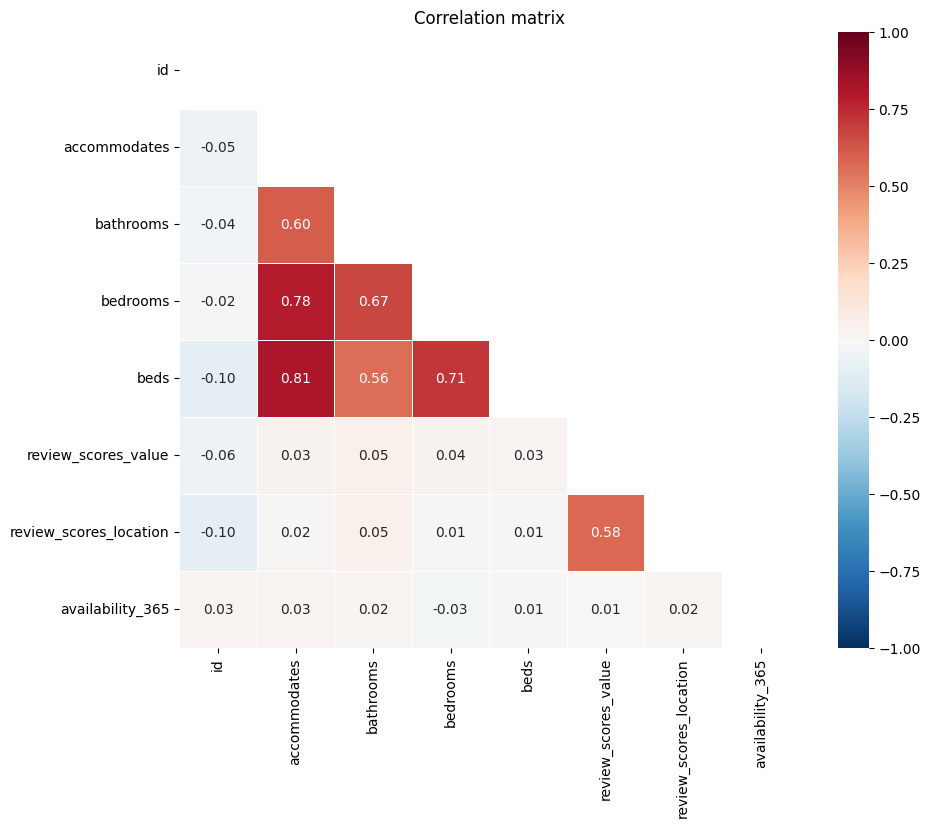

In [ ]:
## Lets have a look if we have some correlation

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

corr = df.select_dtypes(include=['number']).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10,8))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="RdBu_r", vmin=-1, vmax=1, linewidths=.5)
plt.title("Correlation matrix")
plt.show()

At first glance, there are no meaningful correlations among the variables of interest; the strong correlations we do observe (for example between bedrooms and beds) are expected.

Because our goal is to choose neighbourhoods to buy or rent in, we should focus on how booked_days relates to location and apartment capacity (e.g., bedrooms, bathrooms, max_guests).

In [ ]:
#We only have availability_365, so we estimate booked_days as 365 − availability_365

df['booked_days'] = 365 - df['availability_365']

In [ ]:
df.head()

,id,neighbourhood_cleansed,accommodates,bathrooms,bedrooms,beds,amenities,number_of_reviews_ly,review_scores_location,availability_365,booked_days
0,27262,ΑΜΠΕΛΟΚΗΠΟΙ,2,1.0,1.0,NaN,"[""Hangers"", ""Other electric stove"", ""Dedicated...",5,4.75,0,365
1,33945,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,4,1.0,2.0,3.0,"[""Oven"", ""Refrigerator"", ""Bed linens"", ""Hair d...",8,4.64,269,96
2,49489,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,7,1.5,3.0,4.0,"[""Hangers"", ""Dedicated workspace"", ""Kitchen"", ...",4,4.89,72,293
3,60394,ΣΤΑΔΙΟ,2,1.0,1.0,3.0,"[""Hangers"", ""Dedicated workspace"", ""Kitchen"", ...",5,4.92,54,311
4,134340,ΠΑΓΚΡΑΤΙ,2,1.0,1.0,NaN,"[""Hangers"", ""Dedicated workspace"", ""Kitchen"", ...",4,4.56,0,365


I’m also interested in whether booked_days correlates with other variables. We use hier pearson correlation methode

In [1]:
predictors = ['neighbourhood_cleansed', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'review_scores_location', 'review_scores_value']

num = df[predictors].apply(pd.to_numeric, errors='coerce')
corr_pearson = num.corr(method='pearson')['booked_days'] if 'booked_days' in num.columns else None

# if booked_days not in numerical predictors, compute correlations explicitly:
all_num = pd.concat([df[['booked_days']], num], axis=1)
pearson = all_num.corr(method='pearson')['booked_days'].sort_values(ascending=False)
spearman = all_num.corr(method='spearman')['booked_days'].sort_values(ascending=False)

print("Pearson correlations:", pearson)
print("Spearman correlations:", spearman)

Attach to a cluster to execute a cell.

After checking the data, there’s no meaningful correlation between booked_days and the other variables (bathrooms, bedrooms, price, ratings, etc.). Therefore, we’ll proceed with descriptive visualizations to explore patterns, distributions and segment-level differences.

Lets have a look where most booked apartments are located.

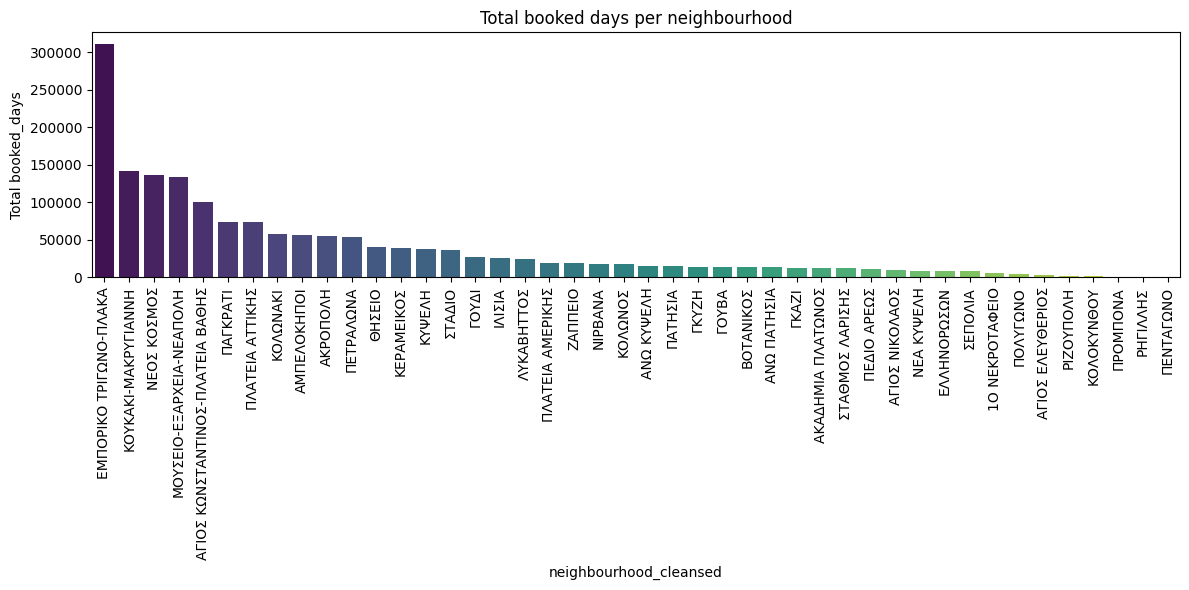

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

agg = df.groupby('neighbourhood_cleansed')['booked_days'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=agg.index, y=agg.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('neighbourhood_cleansed')
plt.ylabel('Total booked_days')
plt.title('Total booked days per neighbourhood')
plt.tight_layout()
plt.show()

where most apartments are located.


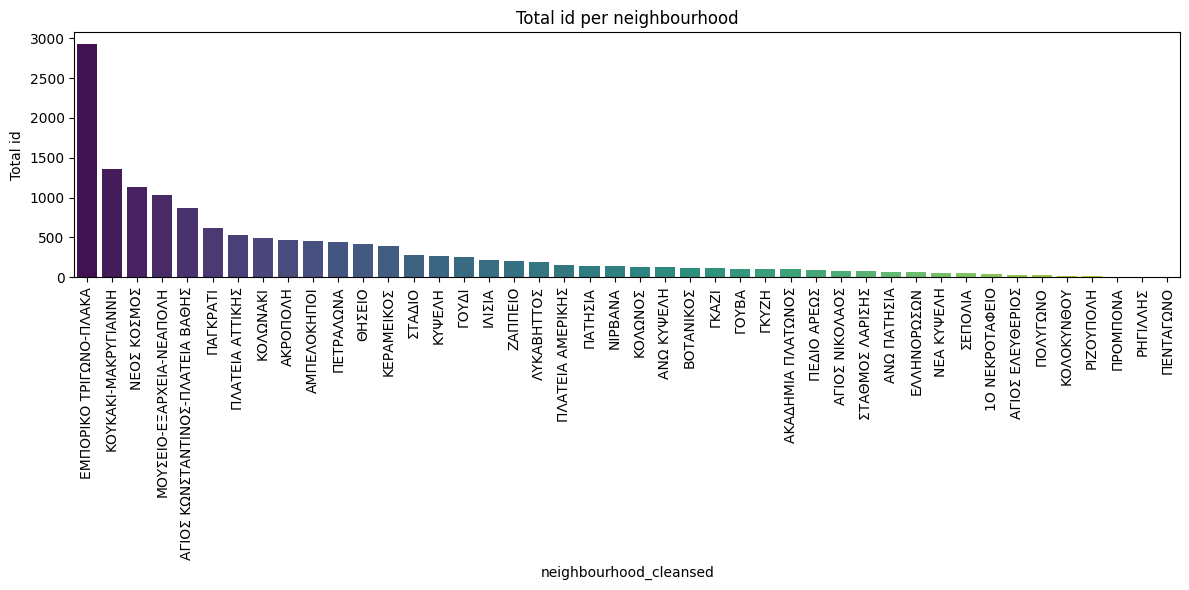

In [ ]:
agg = df.groupby('neighbourhood_cleansed')['id'].count().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=agg.index, y=agg.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('neighbourhood_cleansed')
plt.ylabel('Total id')
plt.title('Total id per neighbourhood')
plt.tight_layout()
plt.show()

High listing counts in a neighborhood don’t necessarily mean high occupancy. 
To get a clearer picture, we should compare average booked days per neighborhood and add average Location and Value ratings for context.

In [ ]:
df2 = df[df['neighbourhood_cleansed'].notna()].copy()

# group and aggregate: total and average booked days, plus count of listings
neigh_stats = (
    df2
    .groupby('neighbourhood_cleansed', as_index=False)
    .agg(
        total_booked_days=('booked_days', 'sum'),
        avg_booked_days=('booked_days', 'mean'),
        avg_rating_loc=('review_scores_location', 'mean'),
        avg_rating_val=('review_scores_value', 'mean')
    )
)
neigh_stats.head()

,neighbourhood_cleansed,total_booked_days,avg_booked_days,avg_rating_loc,avg_rating_val
0,1Ο ΝΕΚΡΟΤΑΦΕΙΟ,6013,133.622222,4.724884,4.762093
1,ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ,3544,110.750000,4.594286,4.653929
2,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,100759,116.619213,4.138360,4.653425
3,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,10037,119.488095,4.296812,4.669130
4,ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ,12844,128.440000,4.376941,4.732941


vizualizing the above data we will have a clear overview. 

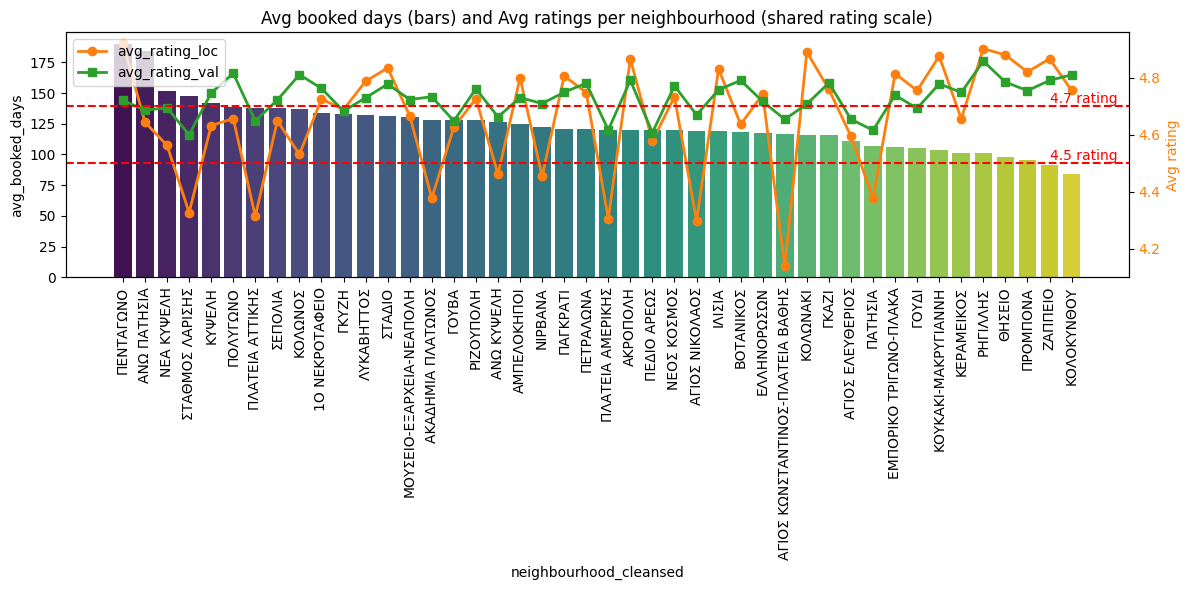

In [ ]:
plt.figure(figsize=(12,6))
ax = plt.gca()

# bars: avg_booked_days (left axis hidden or shown as before)
sns.barplot(x='neighbourhood_cleansed', y='avg_booked_days', data=neigh, palette='viridis', label='avg_booked_days')
plt.xticks(rotation=90)
# Use the right axis for both rating series
ax2 = ax.twinx()
l1, = ax2.plot(neigh['neighbourhood_cleansed'], neigh['avg_rating_loc'], color='C1', marker='o', linewidth=2, label='avg_rating_loc')
l2, = ax2.plot(neigh['neighbourhood_cleansed'], neigh['avg_rating_val'], color='C2', marker='s', linewidth=2, label='avg_rating_val')

# common horizontal line at 4.5
ax2.axhline(4.5,  color='red', linestyle='--', linewidth=1.5)
ax2.text(0.99, 4.5, '4.5 rating',  color='red', va='bottom', ha='right', transform=ax2.get_yaxis_transform())

ax2.axhline(4.7,  color='red', linestyle='--', linewidth=1.5)
ax2.text(0.99, 4.7, '4.7 rating',  color='red', va='bottom', ha='right', transform=ax2.get_yaxis_transform())

ax2.set_ylabel('Avg rating', color='C1')
ax2.tick_params(axis='y', labelcolor='C1')

plt.xticks(rotation=90)
plt.title('Avg booked days (bars) and Avg ratings per neighbourhood (shared rating scale)')
plt.tight_layout()
plt.legend([l1, l2], ['avg_rating_loc', 'avg_rating_val'], loc='upper left')
plt.show()

Surprisingly, the most rented apartments are not located in the area with the highest number of listings.
Where should I buy or rent? 

I would say select neighboorhoods that are having high avg booking days and over 4.7 value for money and location rating for exmp “1Ο ΝΕΚΡΟΤΑΦΕΙΟ”, “ΑΝΩ ΠΑΤΗΣΙΑ”, “ΣΤΑΔΙΟ”, and “ΛΥΚΑΒΗΤΤΟΣ”.

The first one "Pentagono" should be not in consider as we have only one apartmemnt data


## Question2: What equipment and furnishings will maximize my occupancy and bookings

For the second question, we’ll identify which equipment and amenities an apartment should include

As we want to have a good running business I will analyze only the apartments that was geeting more tha 4.5 overall rating.

In [ ]:
#Have a look on the dataframe

df.head()

,id,neighbourhood_cleansed,accommodates,bathrooms,bedrooms,beds,amenities,review_scores_value,review_scores_location,availability_365,booked_days
0,27262,ΑΜΠΕΛΟΚΗΠΟΙ,2,1.0,1.0,NaN,"[""Hangers"", ""Other electric stove"", ""Dedicated...",4.71,4.75,0,365
1,33945,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,4,1.0,2.0,3.0,"[""Oven"", ""Refrigerator"", ""Bed linens"", ""Hair d...",4.81,4.64,269,96
2,49489,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,7,1.5,3.0,4.0,"[""Hangers"", ""Dedicated workspace"", ""Kitchen"", ...",4.69,4.89,72,293
3,60394,ΣΤΑΔΙΟ,2,1.0,1.0,3.0,"[""Hangers"", ""Dedicated workspace"", ""Kitchen"", ...",4.92,4.92,54,311
4,134340,ΠΑΓΚΡΑΤΙ,2,1.0,1.0,NaN,"[""Hangers"", ""Dedicated workspace"", ""Kitchen"", ...",4.83,4.56,0,365


In [ ]:
# Copy the dataframe as a new one and filter the data

df1 = df.copy()
df1['review_scores_value'] = pd.to_numeric(df1['review_scores_value'], errors='coerce')
df1 = df1[df1['review_scores_value'] >= 4.5]

In [ ]:
df1.head()

,id,neighbourhood_cleansed,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,review_scores_value,review_scores_location,availability_365,booked_days
0,27262,ΑΜΠΕΛΟΚΗΠΟΙ,2,1.0,1 bath,1.0,NaN,"[""Hangers"", ""Other electric stove"", ""Dedicated...",4.71,4.75,0,365
1,33945,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,4,1.0,1 bath,2.0,3.0,"[""Oven"", ""Refrigerator"", ""Bed linens"", ""Hair d...",4.81,4.64,269,96
2,49489,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,7,1.5,1.5 baths,3.0,4.0,"[""Hangers"", ""Dedicated workspace"", ""Kitchen"", ...",4.69,4.89,72,293
3,60394,ΣΤΑΔΙΟ,2,1.0,1 bath,1.0,3.0,"[""Hangers"", ""Dedicated workspace"", ""Kitchen"", ...",4.92,4.92,54,311
4,134340,ΠΑΓΚΡΑΤΙ,2,1.0,1 bath,1.0,NaN,"[""Hangers"", ""Dedicated workspace"", ""Kitchen"", ...",4.83,4.56,0,365


In [ ]:
# After filtering I would like to know how many listening we have for analyse
n = df1.shape[0]
print(n)
n_distinct = df1["id"].nunique(dropna=True)   # exclude NaN
print(n_distinct)

11117
11117


It looks like there are enough listings with high ratings to produce reliable results. 
I’ll create a word cloud from the amenities data to highlight the most common features.

[('hair_dryer', 10385), ('kitchen', 10235), ('hot_water', 10117), ('hangers', 9913), ('wifi', 9908), ('iron', 9862), ('dishes_and_silverware', 9784), ('cooking_basics', 9494), ('bed_linens', 9378), ('essentials', 8847), ('shampoo', 8542), ('refrigerator', 8506), ('hot_water_kettle', 8017), ('self_check-in', 7751), ('air_conditioning', 7532), ('shower_gel', 7502), ('wine_glasses', 6973), ('fire_extinguisher', 6747), ('tv', 6715), ('first_aid_kit', 6621), ('elevator', 6603), ('long_term_stays_allowed', 6466), ('lockbox', 6110), ('dedicated_workspace', 6090), ('dining_table', 6042), ('extra_pillows_and_blankets', 5927), ('body_soap', 5883), ('drying_rack_for_clothing', 5879), ('cleaning_products', 5724), ('coffee', 5709)]


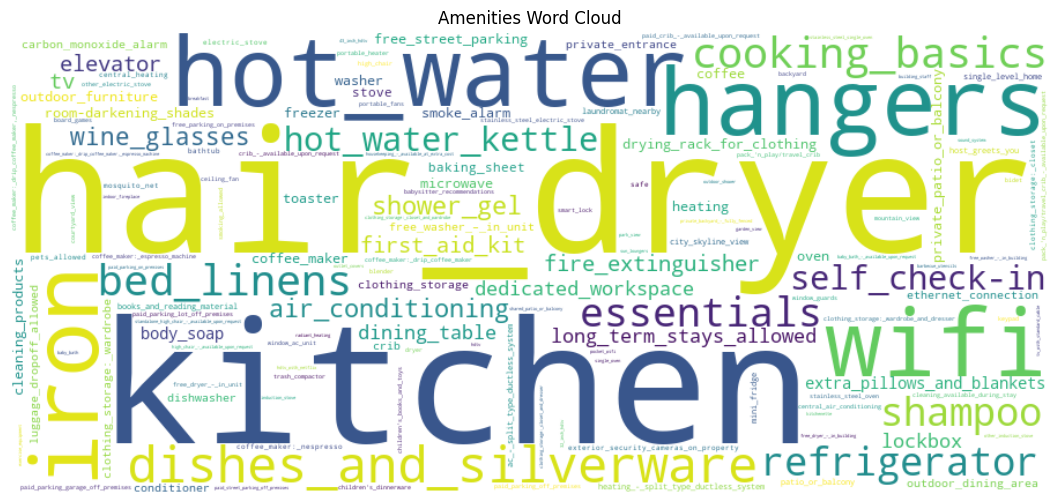

In [ ]:
## Build a word cloud

import ast
from collections import Counter
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def parse_amenities(x):
    """Return a list of amenity strings for a single cell x.
    Handles actual list, JSON-like list string, or comma-separated strings.
    """
    if pd.isna(x):
        return []
    # if already a list
    if isinstance(x, (list, tuple)):
        items = list(x)
    else:
        s = str(x).strip()
        # try to parse JSON / Python literal list: '["Wifi","Iron"]'
        try:
            val = ast.literal_eval(s)
            if isinstance(val, (list, tuple)):
                items = list(val)
            else:
                # fallback to treat as single string
                items = [str(val)]
        except Exception:
            # fallback: remove outer brackets and split by comma
            if s.startswith('[') and s.endswith(']'):
                s = s[1:-1]
            items = [it.strip() for it in s.split(',') if it.strip()]
    # normalize tokens: strip, lower
    cleaned = []
    for it in items:
        token = str(it).strip()
        if not token:
            continue
        # optional normalization examples:
        token = token.replace('"', '').replace("'", "")   # remove stray quotes
        token = token.lower()
        # keep phrases together for the wordcloud (replace spaces with underscore)
        token = token.replace(' ', '_')
        cleaned.append(token)
    return cleaned

# apply to dataframe
# df is your DataFrame with column 'amenities'
amen_lists = df1['amenities'].apply(parse_amenities)

# flatten and count frequencies
all_amenities = [amen for sub in amen_lists for amen in sub]
freqs = Counter(all_amenities)

# optional: inspect top amenities
print(freqs.most_common(30))

# build and display wordcloud from frequencies
wc = WordCloud(width=900, height=400, background_color='white', colormap='viridis')
wc.generate_from_frequencies(freqs)

plt.figure(figsize=(14,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Amenities Word Cloud')
plt.show()



The word cloud above provides a clear overview of amenities and their relative frequencies. However, many terms are variants of the same feature (e.g., "wifi" vs. "wireless internet"), so we will build a new word cloud after normalizing and grouping synonymous words to better reflect the true prevalence of each amenity.

[('wifi', 11219), ('air_conditioning', 11190), ('hair_dryer', 10385), ('kitchen', 10275), ('hot_water', 10117), ('hangers', 9913), ('iron', 9862), ('heating', 9846), ('dishes_and_silverware', 9784), ('cooking_basics', 9494), ('bed_linens', 9378), ('essentials', 8847), ('shampoo', 8543), ('refrigerator', 8506), ('parking', 8306), ('washer', 8231), ('hot_water_kettle', 8017), ('self_check_in', 7751), ('tv', 7546), ('shower_gel', 7502), ('wine_glasses', 6973), ('fire_extinguisher', 6747), ('first_aid_kit', 6621), ('elevator', 6603), ('long_term_stays_allowed', 6466), ('lockbox', 6110), ('dedicated_workspace', 6090), ('dining_table', 6042), ('extra_pillows_and_blankets', 5927), ('body_soap', 5885), ('drying_rack_for_clothing', 5879), ('cleaning_products', 5724), ('coffee', 5709), ('room-darkening_shades', 5632), ('microwave', 5439), ('oven', 5293), ('freezer', 5028), ('smoke_alarm', 4988), ('private_patio_or_balcony', 4760), ('outdoor_furniture', 4385)]


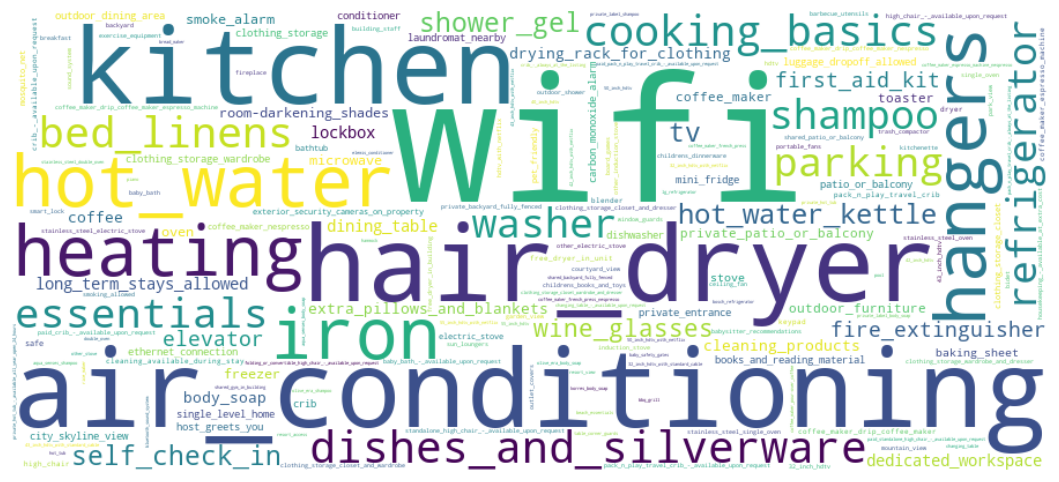

In [ ]:
## Make the word cloud efficient using similar word groups

import re
import ast
from collections import Counter
import pandas as pd

# optional fuzzy matching: pip install rapidfuzz
try:
    from rapidfuzz import process, fuzz
    HAS_RAPIDFUZZ = True
except Exception:
    HAS_RAPIDFUZZ = False

def parse_amenities_cell(x):
    if pd.isna(x):
        return []
    if isinstance(x, (list, tuple)):
        items = list(x)
    else:
        s = str(x).strip()
        try:
            val = ast.literal_eval(s)
            if isinstance(val, (list, tuple)):
                items = list(val)
            else:
                items = [str(val)]
        except Exception:
            if s.startswith('[') and s.endswith(']'):
                s = s[1:-1]
            items = [it.strip() for it in s.split(',') if it.strip()]
    return [str(it).strip() for it in items]

# mapping via regex patterns to canonical token
CANON_PATTERNS = {
    r'\bwifi\b|\bwi-?fi\b|\bwireless\b|\binternet\b': 'wifi',
    r'\btv\b|\btelevision\b': 'tv',
    r'\bair[- ]?conditioning\b|\bac\b|\ba/c\b': 'air_conditioning',
    r'\bhair[- ]?dryer\b|\bhairdryer\b': 'hair_dryer',
    r'\bself[- ]?check[- ]?in\b|\bselfcheckin\b|\bself check in\b|\bself_check_in\b': 'self_check_in',
    r'\blockbox\b|\block[- ]?box\b|\bkey[- ]?safe\b': 'lockbox',
    r'\bwasher\b|\bwashing[- ]?machine\b': 'washer',
    r'\bkitchen\b': 'kitchen',
    r'\biron\b|\bironing\b': 'iron',
    r'\bheating\b|\bheater\b': 'heating',
    r'\belevator\b|\blift\b': 'elevator',
    r'\bparking\b|\bparking[- ]?space\b|\bfree parking\b': 'parking',
    r'\bpool\b|\bswimming[- ]?pool\b': 'pool',
    r'\bbreakfast\b|\bbreakfast included\b': 'breakfast',
    r'\bsmoke[- ]?alarm\b|\bsmoke alarm\b': 'smoke_alarm',
    r'\bfireplace\b': 'fireplace',
    r'\bpet[- ]?friendly\b|\bpets allowed\b': 'pet_friendly',
    # add more as needed
}
# precompile
CANON_REGEX = [(re.compile(p, flags=re.I), v) for p, v in CANON_PATTERNS.items()]

def canonicalize_token(token):
    t = token.lower()
    t = re.sub(r'[\"\'\[\]]', '', t)
    t = re.sub(r'[_/ ]+', ' ', t)
    t = re.sub(r'[^\w\s\-\&]', '', t)   # remove punctuation except - &
    t = re.sub(r'\s+', ' ', t).strip()
    # try pattern mapping
    for rx, canon in CANON_REGEX:
        if rx.search(t):
            return canon
    # simple normalizations
    t = t.replace(' ', '_')
    # fallback: if rapidfuzz available, leave to grouping step
    return t

# Parse, canonicalize, and count
amen_lists = df1['amenities'].apply(parse_amenities_cell)
flattened = []
for sub in amen_lists:
    for a in sub:
        canon = canonicalize_token(a)
        flattened.append(canon)

# optional fuzzy grouping: merge similar leftover tokens (requires rapidfuzz)
if HAS_RAPIDFUZZ:
    counts = Counter(flattened)
    keys = list(counts.keys())
    merged = {}
    threshold = 85  # similarity threshold 0-100
    for k in sorted(keys, key=lambda s: -counts[s]):  # start with frequent
        if k in merged:
            continue
        merged[k] = k
        choices = [c for c in keys if c not in merged]
        if not choices:
            continue
        matches = process.extract(k, choices, scorer=fuzz.partial_ratio, score_cutoff=threshold, limit=None)
        for m, score, _ in matches:
            merged[m] = k
    # rebuild final counter
    final = Counter()
    for k, cnt in counts.items():
        final[merged.get(k, k)] += cnt
else:
    final = Counter(flattened)

# inspect
print(final.most_common(40))

# generate wordcloud as before
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width=900, height=400, background_color='white', colormap='viridis')
wc.generate_from_frequencies(final)

plt.figure(figsize=(14,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

The second word cloud highlights subtle but important changes: after normalizing and grouping synonyms, the most relevant amenities stand out more clearly. The table above also shows the frequency of each amenity.

In [ ]:
# one more overview which frequency has each group of amenities words

counts = df["amenities"].value_counts(dropna=False)
print(counts) 

["Wifi", "Iron", "Lockbox", "TV", "Air conditioning", "Hair dryer", "Self check-in"]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    